# A Spitznagelian Peak Around the Corner

As the market reaches record highs and people jump off the black swan bandwagon, it's time to start hedging. A Spitznagelian view for hedging is looking for a high Faustmann Value and low ROIC. Other factors will contribute to a company's fragility most notably, debt. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
aug = pd.read_csv("aug_clean.csv")

We will assign a Faustmann Ratio to all stocks.

In [2]:
aug = aug.assign(faust = aug.MARKETCAP / (aug.INVCAP_MRQ + aug.CASHNEQ_MRQ - aug.DEBT_MRQ - aug.PREFDIVIS_MRQ))

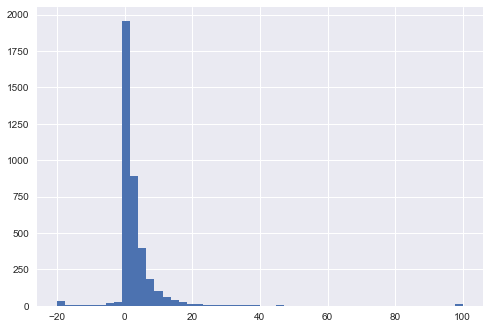

In [9]:
plt.hist(aug.faust.clip(-20.0, 100), bins = 50)
plt.show()

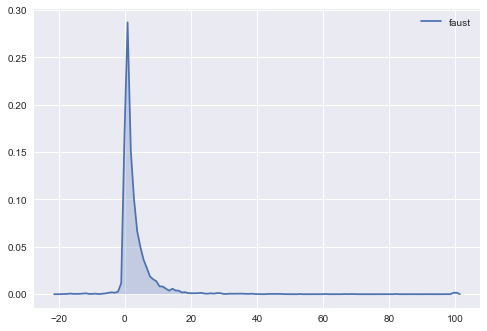

In [10]:
sns.kdeplot(aug.faust.clip(-20.0, 100), shade=True)
sns.plt.show()

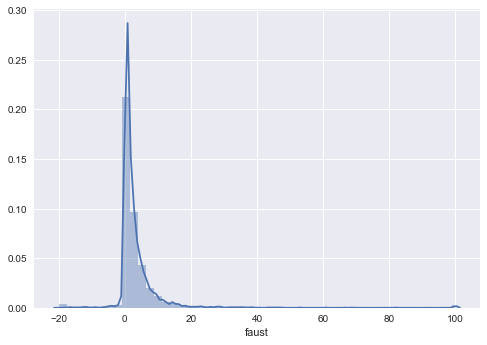

In [14]:
sns.distplot(aug.faust.clip(-20.0, 100),bins=50)
sns.plt.show()

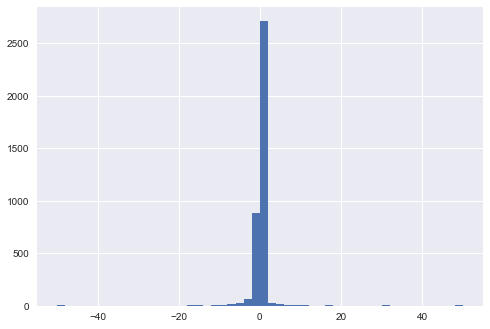

In [11]:
plt.hist(aug.ROIC_MRT.clip(-50.0,50.0), bins=50)
plt.show()

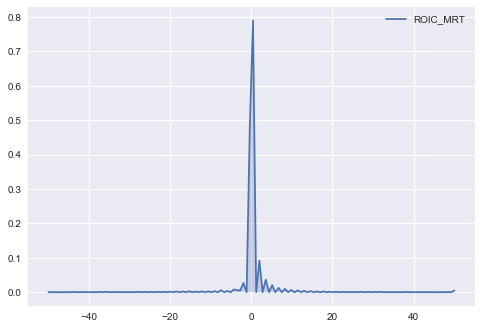

In [12]:
sns.kdeplot(aug.ROIC_MRT.clip(-50.0,50.0), shade=True)
sns.plt.show()

In [7]:
#Divide the two into quantiles so that we can easily screen the companies.
#Make faust into quantailes (10)
aug = aug.assign(faust_quantile = pd.qcut(aug['faust'],10,labels=False))
#ROIC quantiles
aug = aug.assign(roic_quantile = pd.qcut(aug['ROIC_MRT'], 10, labels=False))
#Reassign negative faustmann values to an arbitrary score. 
aug['faust_quantile'][aug.faust < 0.0] = 11

In [8]:
fragile_comp = aug[(aug.faust_quantile >=9)][aug.roic_quantile<=1]
fragile_comp = fragile_comp.sort_values('DEBT_MRQ', ascending=True)
fragile_comp.head()

,Unnamed: 0,Ticker,Date,ASSETS_MRQ,CASHNEQ_MRQ,DEBT_MRQ,FCFPS_MRQ,INTANGIBLES_MRQ,INVCAP_MRQ,LIABILITIES_MRQ,PB_MRQ,PE_MRT,PREFDIVIS_MRQ,ROIC_MRT,MARKETCAP,faust,faust_quantile,roic_quantile
31,31,ACAD,2017-06-30,456315000.0,146264000.0,0.0,-0.484466,6277000.0,262861000.0,41175000.0,8.199343,-11.138590,0.0,-0.925862,3.615705e+09,8.837654,9,0
944,944,CYRX,2017-06-30,17191618.0,13217929.0,0.0,-0.040032,29728.0,1976413.0,2164521.0,7.849844,-11.658479,0.0,-5.710448,1.685264e+08,11.091390,9,0
1063,1063,DWRE,2016-03-31,372097000.0,117841000.0,0.0,-0.082918,81969000.0,108700000.0,83896000.0,5.122490,-33.500893,0.0,-0.414654,1.820101e+09,8.034309,9,1
1362,1362,FMI,2017-06-30,146366000.0,38837000.0,0.0,-0.790821,0.0,60033000.0,56850000.0,15.827126,-8.989613,0.0,-1.683774,1.273368e+09,12.879216,9,0
1382,1382,FORR,2017-06-30,314193000.0,67106000.0,0.0,0.323963,76133000.0,-7825000.0,186819000.0,5.451997,38.588725,0.0,-60.131779,6.933994e+08,11.696824,9,0


This could be a valuable screen for companies whose fragilities may be exposed under a stress test. Obviously, the next step is to get creative. Evaluating a potential company's fragility with debt, liquidation value, and other fundamentals. 